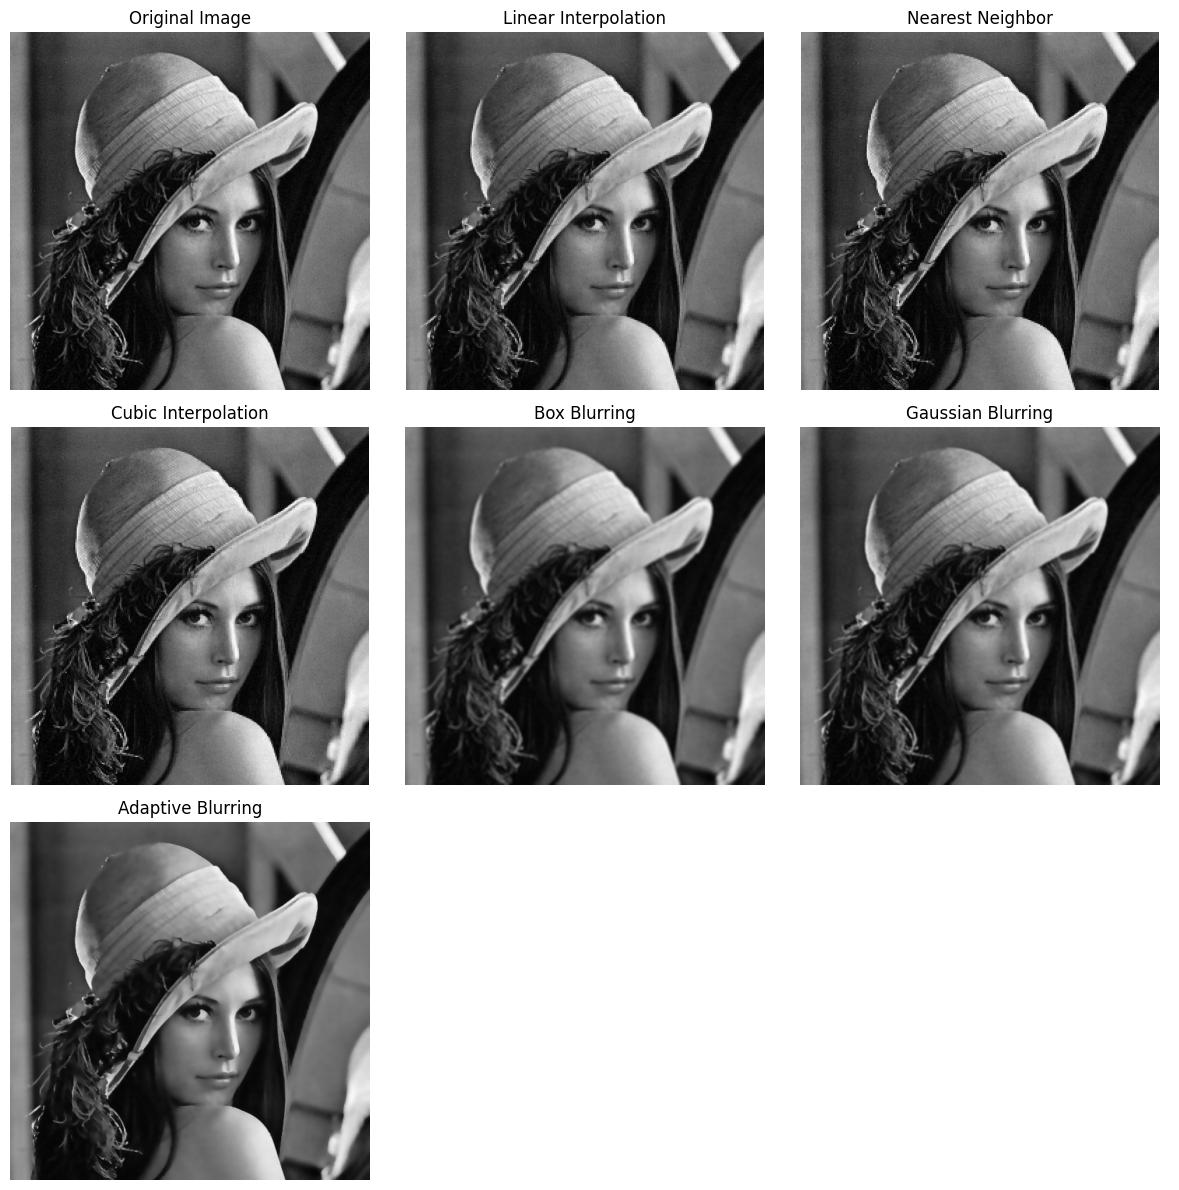

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the Lena image
lena = cv2.imread(cv2.samples.findFile('Lena_img.png'))
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

# Resize the image using different interpolation methods
resize_linear = cv2.resize(lena, (256, 256), interpolation=cv2.INTER_LINEAR)
resize_nearest = cv2.resize(lena, (256, 256), interpolation=cv2.INTER_NEAREST)
resize_cubic = cv2.resize(lena, (256, 256), interpolation=cv2.INTER_CUBIC)

# Apply different blurring techniques
box_blur = cv2.blur(lena, (5, 5))
gaussian_blur = cv2.GaussianBlur(lena, (5, 5), 0)
adaptive_blur = cv2.bilateralFilter(lena, 9, 75, 75)

# Plot the results
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.ravel()

# Original Image
axes[0].imshow(lena)
axes[0].set_title("Original Image")

# Resized Images
axes[1].imshow(resize_linear)
axes[1].set_title("Linear Interpolation")

axes[2].imshow(resize_nearest)
axes[2].set_title("Nearest Neighbor")

axes[3].imshow(resize_cubic)
axes[3].set_title("Cubic Interpolation")

# Blurred Images
axes[4].imshow(box_blur)
axes[4].set_title("Box Blurring")

axes[5].imshow(gaussian_blur)
axes[5].set_title("Gaussian Blurring")

axes[6].imshow(adaptive_blur)
axes[6].set_title("Adaptive Blurring")

# Turn off axes for all
for ax in axes:
    ax.axis("off")

plt.tight_layout()
plt.show()



Evaluating Decision Tree...
Accuracy: 0.8250
Precision: 0.8241
Recall: 0.8250
F1-Score: 0.8237
Confusion Matrix:
 [[35  0  0  0  0  0  0  0  1  0]
 [ 0 26  2  1  1  0  1  1  4  0]
 [ 1  0 28  3  0  1  2  0  0  0]
 [ 0  0  2 30  0  1  1  1  0  2]
 [ 1  0  1  1 31  0  1  0  1  0]
 [ 0  0  0  0  1 35  0  0  0  1]
 [ 1  1  0  0  1  2 30  0  1  0]
 [ 0  1  1  0  2  0  0 31  0  1]
 [ 0  3  1  0  0  1  2  2 24  2]
 [ 0  0  1  3  0  0  0  2  3 27]]
AUC: 0.9024

Evaluating Artificial Neural Network...
Accuracy: 0.9778
Precision: 0.9787
Recall: 0.9778
F1-Score: 0.9778
Confusion Matrix:
 [[34  0  1  0  1  0  0  0  0  0]
 [ 0 35  0  0  0  1  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  1  0  0 35  0  0]
 [ 0  3  0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0  1  0 35]]
AUC: 0.9995


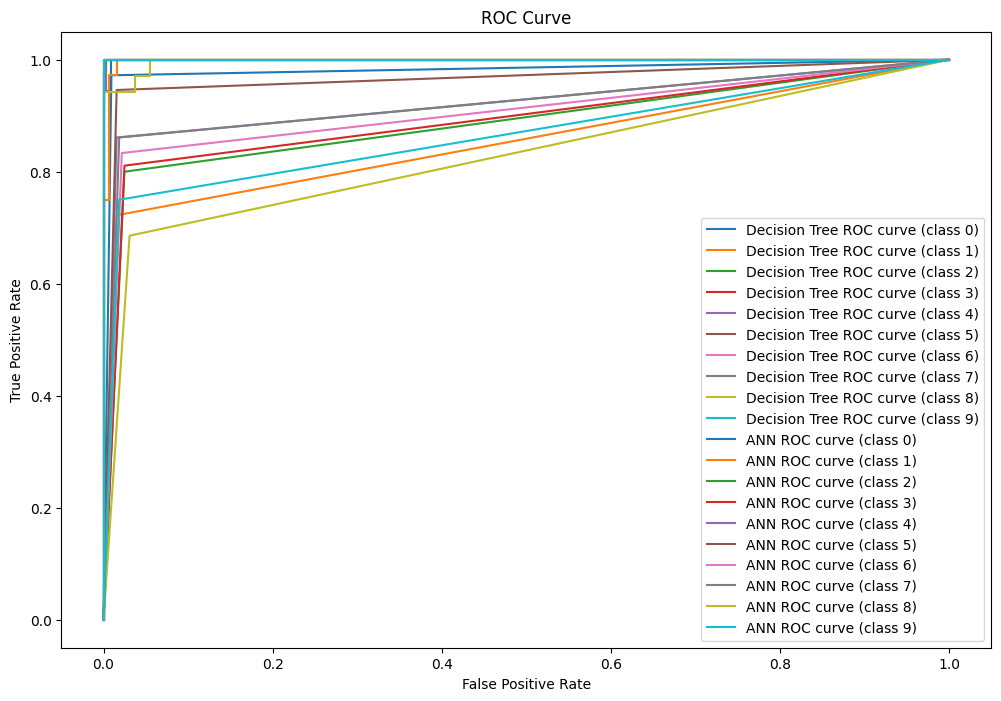

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Load the MNIST dataset (as sklearn's load_digits is similar to MNIST for demonstration purposes)
data = load_digits()
X = data.data
y = data.target

# Binarize the labels for multi-class ROC-AUC
n_classes = len(np.unique(y))
y_bin = label_binarize(y, classes=range(n_classes))

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
y_test_bin = label_binarize(y_test, classes=range(n_classes))

# Initialize K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # Calculate ROC and AUC for multi-class
    y_prob = model.predict_proba(X_test)
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_prob[:, i])

    # Average AUC
    auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')

    return accuracy, precision, recall, f1, cm, auc, fpr, tpr, roc_auc

# Evaluate Decision Tree
print("\nEvaluating Decision Tree...")
decision_tree = DecisionTreeClassifier(random_state=42)
dt_metrics = evaluate_model(decision_tree, X_train, X_test, y_train, y_test)
print(f"Accuracy: {dt_metrics[0]:.4f}")
print(f"Precision: {dt_metrics[1]:.4f}")
print(f"Recall: {dt_metrics[2]:.4f}")
print(f"F1-Score: {dt_metrics[3]:.4f}")
print("Confusion Matrix:\n", dt_metrics[4])
print(f"AUC: {dt_metrics[5]:.4f}")

# Evaluate ANN
print("\nEvaluating Artificial Neural Network...")
ann = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)
ann_metrics = evaluate_model(ann, X_train, X_test, y_train, y_test)
print(f"Accuracy: {ann_metrics[0]:.4f}")
print(f"Precision: {ann_metrics[1]:.4f}")
print(f"Recall: {ann_metrics[2]:.4f}")
print(f"F1-Score: {ann_metrics[3]:.4f}")
print("Confusion Matrix:\n", ann_metrics[4])
print(f"AUC: {ann_metrics[5]:.4f}")

# Plot ROC curves
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    plt.plot(dt_metrics[6][i], dt_metrics[7][i], label=f'Decision Tree ROC curve (class {i})')
for i in range(n_classes):
    plt.plot(ann_metrics[6][i], ann_metrics[7][i], label=f'ANN ROC curve (class {i})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()
#ROC curve ek graph hai jo dikhata hai ki hamara model alag-alag threshold pe kitna achha predict kar raha hai. Jitna curve top-left ke close hota hai, utna model accurate hota hai


Evaluating Naïve Bayes...
Accuracy: 0.8111
Precision: 0.8480
Recall: 0.8111
F1-Score: 0.8151
Confusion Matrix:
 [[33  0  0  0  1  1  0  0  1  0]
 [ 0 29  1  0  0  0  1  0  3  2]
 [ 0  3 19  0  0  0  0  0 13  0]
 [ 0  0  1 26  0  0  0  1  8  1]
 [ 0  2  0  0 26  0  1  6  1  0]
 [ 0  0  0  0  0 35  0  1  0  1]
 [ 0  1  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  1  0 35  0  0]
 [ 0  4  1  0  0  0  0  1 29  0]
 [ 0  3  1  0  0  0  0  4  3 25]]
AUC: 0.9705

Evaluating Random Forest...
Accuracy: 0.9611
Precision: 0.9620
Recall: 0.9611
F1-Score: 0.9609
Confusion Matrix:
 [[35  0  0  0  1  0  0  0  0  0]
 [ 0 35  0  0  0  1  0  0  0  0]
 [ 1  0 34  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  1]
 [ 0  1  0  0 35  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  1  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  3  0  0  0  0  0  2 30  0]
 [ 0  0  0  1  0  0  0  1  1 33]]
AUC: 0.9992


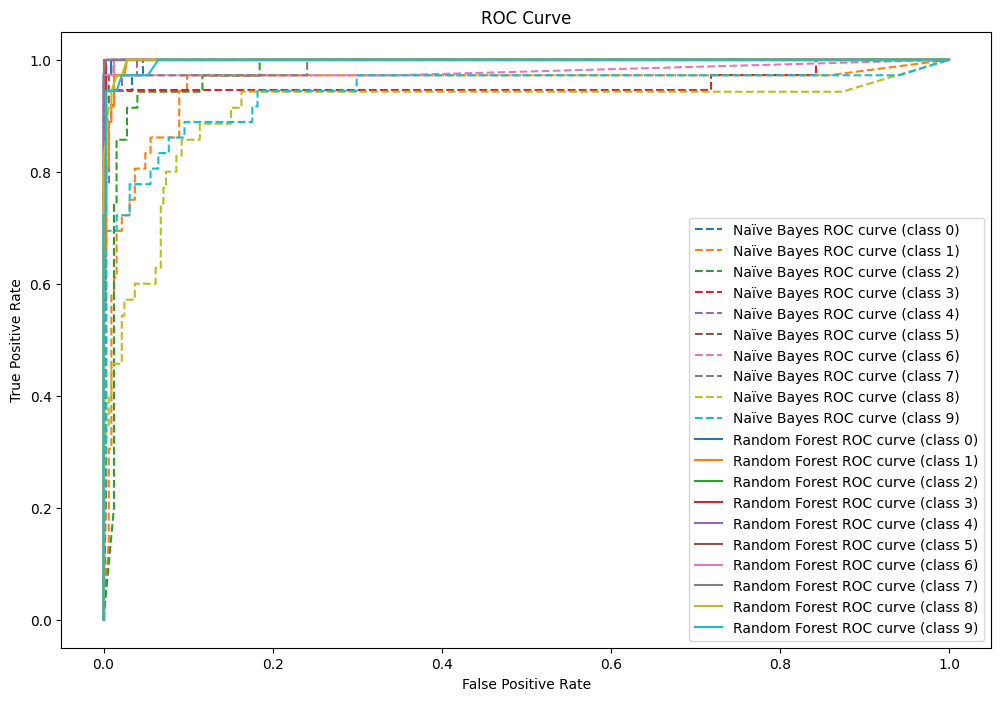

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Load the MNIST dataset (as sklearn's load_digits is similar to MNIST for demonstration purposes)
data = load_digits()
X = data.data
y = data.target

# Binarize the labels for multi-class ROC-AUC
n_classes = len(np.unique(y))
y_bin = label_binarize(y, classes=range(n_classes))

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
y_test_bin = label_binarize(y_test, classes=range(n_classes))

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # Calculate ROC and AUC for multi-class
    y_prob = model.predict_proba(X_test)
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_prob[:, i])

    # Average AUC
    auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')

    return accuracy, precision, recall, f1, cm, auc, fpr, tpr, roc_auc

# Evaluate Naïve Bayes
print("\nEvaluating Naïve Bayes...")
nb = GaussianNB()
nb_metrics = evaluate_model(nb, X_train, X_test, y_train, y_test)
print(f"Accuracy: {nb_metrics[0]:.4f}")
print(f"Precision: {nb_metrics[1]:.4f}")
print(f"Recall: {nb_metrics[2]:.4f}")
print(f"F1-Score: {nb_metrics[3]:.4f}")
print("Confusion Matrix:\n", nb_metrics[4])
print(f"AUC: {nb_metrics[5]:.4f}")

# Evaluate Random Forest
print("\nEvaluating Random Forest...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_metrics = evaluate_model(rf, X_train, X_test, y_train, y_test)
print(f"Accuracy: {rf_metrics[0]:.4f}")
print(f"Precision: {rf_metrics[1]:.4f}")
print(f"Recall: {rf_metrics[2]:.4f}")
print(f"F1-Score: {rf_metrics[3]:.4f}")
print("Confusion Matrix:\n", rf_metrics[4])
print(f"AUC: {rf_metrics[5]:.4f}")

# Plot ROC curves
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    plt.plot(nb_metrics[6][i], nb_metrics[7][i], label=f'Naïve Bayes ROC curve (class {i})', linestyle='dashed')
for i in range(n_classes):
    plt.plot(rf_metrics[6][i], rf_metrics[7][i], label=f'Random Forest ROC curve (class {i})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()
